In [1]:
import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=1.5) 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('quantification_correlations.csv')

In [3]:
df.head()
df['Simulated dataset'] = df.apply(lambda x: '{} Rep {}'.format(x.sim_type.capitalize(), x.replicate), axis=1)

In [4]:
df

,tech,quant_level,sim_type,replicate,pearson,Unnamed: 5,Simulated dataset
0,TALON,gene,perfect,1,0.994203,NaN,Perfect Rep 1
1,TALON,transcript,perfect,1,0.992991,NaN,Perfect Rep 1
2,TALON,gene,perfect,2,0.975218,NaN,Perfect Rep 2
3,TALON,transcript,perfect,2,0.839617,NaN,Perfect Rep 2
4,TALON,gene,normal,1,0.975218,NaN,Normal Rep 1
5,TALON,transcript,normal,1,0.839617,NaN,Normal Rep 1
6,TALON,gene,normal,2,0.979331,NaN,Normal Rep 2
7,TALON,transcript,normal,2,0.757102,NaN,Normal Rep 2
8,FLAIR,gene,perfect,1,0.906033,NaN,Perfect Rep 1
9,FLAIR,transcript,perfect,1,0.488976,NaN,Perfect Rep 1


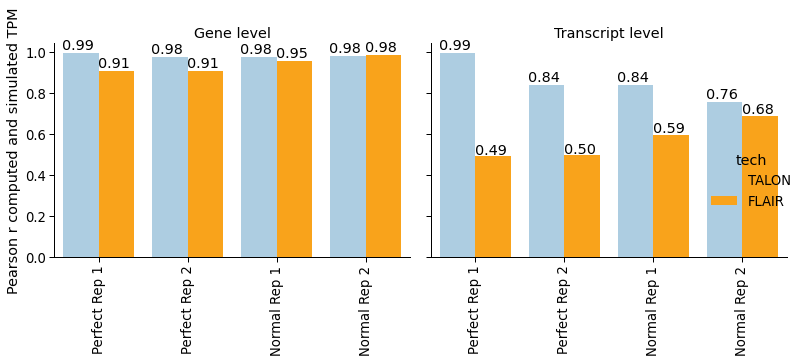

In [5]:
c_dict = {'TALON': '#adcde1', 'FLAIR': '#f9a31b'}
g = sns.catplot(data=df, x='Simulated dataset', y='pearson', col='quant_level', hue='tech', kind='bar', saturation=1, palette=c_dict)
for i,ax in enumerate(g.axes.flat):
    plt.setp(ax.get_xticklabels(),rotation=90)
#     plt.tight_layout()
    if i == 0: 
        ax.set(xlabel='', ylabel='Pearson r computed and simulated TPM', title='Gene level')
    else: 
        ax.set(xlabel='', title='Transcript level')
        
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{:.2f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='medium')
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() - 0.005, 
            p.get_height() * 1.02, 
           '{:.2f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='medium')
plt.tight_layout()
plt.savefig('quantification_correlation_barplot.pdf', dpi=300)